In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
building_metadata = pd.read_csv('building_metadata.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')
weather_test=pd.read_csv('weather_test.csv')
weather_train=pd.read_csv('weather_train.csv')

In [81]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [82]:
building_metadata.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [83]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [84]:
train_meta= train.merge(right=building_metadata, how='left')
full_training= train_meta.merge(right=weather_train, how='left')
full_training.tail()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
20216095,1444,0,2016-12-31 23:00:00,8.750,15,Entertainment/public assembly,19619,1914.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216096,1445,0,2016-12-31 23:00:00,4.825,15,Education,4298,NaN,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216097,1446,0,2016-12-31 23:00:00,0.000,15,Entertainment/public assembly,11265,1997.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216098,1447,0,2016-12-31 23:00:00,159.575,15,Lodging/residential,29775,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8
20216099,1448,0,2016-12-31 23:00:00,2.850,15,Office,92271,2001.0,NaN,1.7,NaN,-5.6,-1.0,1008.5,180.0,8.8


In [85]:
test_meta= test.merge(right=building_metadata, how='left')
full_test= test_meta.merge(right=weather_test,on=['site_id', 'timestamp'] ,how='left')
full_test.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6


Distribution of Primary Use of Buildings

[Text(0,0,'Education'),
 Text(0,0,'Entertainment/public assembly'),
 Text(0,0,'Food sales and service'),
 Text(0,0,'Healthcare'),
 Text(0,0,'Lodging/residential'),
 Text(0,0,'Manufacturing/industrial'),
 Text(0,0,'Office'),
 Text(0,0,'Other'),
 Text(0,0,'Parking'),
 Text(0,0,'Public services'),
 Text(0,0,'Religious worship'),
 Text(0,0,'Retail'),
 Text(0,0,'Services'),
 Text(0,0,'Technology/science'),
 Text(0,0,'Utility'),
 Text(0,0,'Warehouse/storage')]

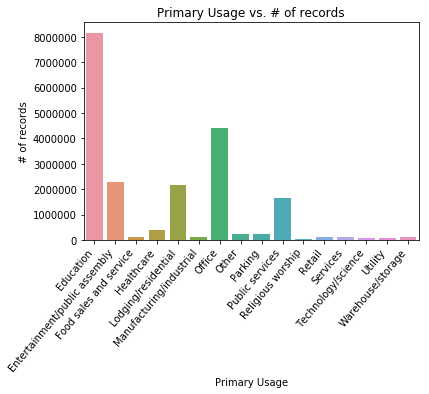

<Figure size 1440x720 with 0 Axes>

In [86]:
grouped= full_training.groupby('primary_use').count().reset_index()
fig=sns.barplot(x='primary_use', y='building_id', data= grouped)
plt.figure(figsize=(20,10))
fig.set(xlabel='Primary Usage', ylabel='# of records', title='Primary Usage vs. # of records')
fig.set_xticklabels(fig.get_xticklabels(), rotation=50, ha="right")

[Text(28.8728,0.5,'# of records'),
 Text(0.5,17.2,'Meter Type'),
 Text(0.5,1,'Primary Usage vs. # of records')]

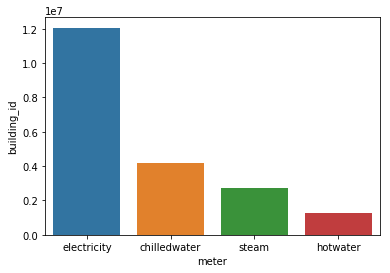

<Figure size 1440x720 with 0 Axes>

In [87]:
groupmeter= full_training.groupby('meter').count().reset_index()
groupmeter['meter']=groupmeter['meter'].replace({0:'electricity',1:'chilledwater',2:'steam',3:'hotwater'})
fig2=sns.barplot(x='meter', y='building_id',data=groupmeter)
plt.figure(figsize=(20,10))
fig.set(xlabel='Meter Type', ylabel='# of records', title='Primary Usage vs. # of records')

In [94]:
weather_train.isna().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64